In [1]:
import uproot
import uproot_methods.classes.TLorentzVector as LVepm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import expon

CPU times: user 1.42 s, sys: 391 ms, total: 1.81 s
Wall time: 1.58 s


In [2]:
#load dataset
eventsData = uproot.open("/Users/jameskeaveney/UCT3rdYearLabs/UCT3rdYearLabATLASOpenData/data.GamGam.root")["mini"]

CPU times: user 59.7 ms, sys: 3.48 ms, total: 63.2 ms
Wall time: 71.1 ms


In [43]:
%%time
eventsData.show()

runNumber                  (no streamer)              asdtype('>i4')
eventNumber                (no streamer)              asdtype('>i4')
channelNumber              (no streamer)              asdtype('>i4')
mcWeight                   (no streamer)              asdtype('>f4')
scaleFactor_PILEUP         (no streamer)              asdtype('>f4')
scaleFactor_ELE            (no streamer)              asdtype('>f4')
scaleFactor_MUON           (no streamer)              asdtype('>f4')
scaleFactor_PHOTON         (no streamer)              asdtype('>f4')
scaleFactor_TAU            (no streamer)              asdtype('>f4')
scaleFactor_BTAG           (no streamer)              asdtype('>f4')
scaleFactor_LepTRIGGER     (no streamer)              asdtype('>f4')
scaleFactor_PhotonTRIGGER  (no streamer)              asdtype('>f4')
trigE                      (no streamer)              asdtype('bool')
trigM                      (no streamer)              asdtype('bool')
trigP                      (no s

In [45]:
%%time
#this cell can take about a minute to run

df = eventsData.pandas.df(["photon_pt", "photon_eta", "photon_phi", "photon_E", "photon_eta", "photon_isTightID","photon_etcone20","photon_ptcone30", "trigP","photon_trigMatched"])
df = df.unstack()
df

CPU times: user 39.2 s, sys: 10.3 s, total: 49.4 s
Wall time: 50.9 s


photon_pt                       photon_eta                    \
subentry             0             1   2   3          0         1   2   3   
entry                                                                       
0         46690.222656  29442.607422 NaN NaN  -1.779089  1.168063 NaN NaN   
1         60888.738281  37795.011719 NaN NaN   0.174119 -0.968964 NaN NaN   
2         39186.210938  25327.361328 NaN NaN   0.139337 -1.309055 NaN NaN   
3         35529.687500  29579.597656 NaN NaN   1.048340  1.293301 NaN NaN   
4         48605.835938  29717.974609 NaN NaN  -0.448705  0.351249 NaN NaN   
...                ...           ...  ..  ..        ...       ...  ..  ..   
7798419   42760.800781  29416.091797 NaN NaN  -0.823499 -0.356217 NaN NaN   
7798420   56330.578125  27199.380859 NaN NaN  -0.142294 -0.594473 NaN NaN   
7798421   36401.964844  35773.832031 NaN NaN  -1.776634  0.870691 NaN NaN   
7798422   72873.671875  45556.425781 NaN NaN   0.935952 -0.666378 NaN NaN   
7798423   41198.300781  39577.066406 NaN NaN   0.311521  1.109877 NaN NaN   

         photon_phi            ... photon_ptcone30     trigP                  \
subentry          0         1  ...               2   3     0     1    2    3   
entry                          ...                                             
0         -2.186474  1.127363  ...             NaN NaN  True  True  NaN  NaN   
1          1.859500 -0.888251  ...             NaN NaN  True  True  NaN  NaN   
2          1.016534 -1.787857  ...             NaN NaN  True  True  NaN  NaN   
3          1.587437 -1.533586  ...             NaN NaN  True  True  NaN  NaN   
4          0.719785  2.904021  ...             NaN NaN  True  True  NaN  NaN   
...             ...       ...  ...             ...  ..   ...   ...  ...  ...   
7798419    2.304370 -0.768865  ...             NaN NaN  True  True  NaN  NaN   
7798420   -2.986454  0.670651  ...             NaN NaN  True  True  NaN  NaN   
7798421   -2.817174  0.713682  ...             NaN NaN  True  True  NaN  NaN   
7798422    3.046246  0.610477  ...             NaN NaN  True  True  NaN  NaN   
7798423   -0.288351  1.504822  ...             NaN NaN  True  True  NaN  NaN   

         photon_trigMatched                  
subentry                  0     1    2    3  
entry                                        
0                      True  True  NaN  NaN  
1                      True  True  NaN  NaN  
2                      True  True  NaN  NaN  
3                      True  True  NaN  NaN  
4                      True  True  NaN  NaN  
...                     ...   ...  ...  ...  
7798419                True  True  NaN  NaN  
7798420                True  True  NaN  NaN  
7798421                True  True  NaN  NaN  
7798422                True  True  NaN  NaN  
7798423                True  True  NaN  NaN  

[7798424 rows x 36 columns]

In [48]:
%%time
#this cell can take about 8-10 seconds to run

cut0 = df[(df.trigP == True ) ]

cut0a = cut0[(cut0.photon_trigMatched[0] == True) & (cut0.photon_trigMatched[1] == True ) ]

cuts1 = cut0a[(cut0a.photon_isTightID[0] == True) & (cut0a.photon_isTightID[1] == True)]

cuts2 = cuts1[(cuts1.photon_pt[0] > 40000) & (cuts1.photon_pt[1] > 30000) & (np.abs(cuts1.photon_eta[0]) < 2.37) & (np.abs(cuts1.photon_eta[1]) < 2.37) ]

cuts2a = cuts2[ ((np.abs(cuts2.photon_eta[0]) < 1.37) |  (np.abs(cuts2.photon_eta[0]) > 1.52) ) & ((np.abs(cuts2.photon_eta[1]) < 1.37) |  (np.abs(cuts2.photon_eta[1]) > 1.52) ) ]

cuts3 = cuts2a[((cuts2a.photon_etcone20[0]/cuts2a.photon_pt[0] ) < 0.065) & ( (cuts2a.photon_etcone20[1]/cuts2a.photon_pt[1] ) < 0.065) ]

cuts4 = cuts3[( (cuts3.photon_ptcone30[0]/cuts3.photon_pt[0] ) < 0.065) & (  (cuts3.photon_ptcone30[1]/cuts3.photon_pt[1] ) < 0.065) ]

cuts5 = cuts4[cuts4.photon_pt[0] / np.sqrt(2.0*cuts4.photon_pt[0]*cuts4.photon_pt[1] * ( np.cosh(cuts4.photon_eta[0]-cuts4.photon_eta[1]) - np.cos(cuts4.photon_phi[0]-cuts4.photon_phi[1]))) > 0.35]

cuts6 = cuts5[cuts5.photon_pt[1] / np.sqrt(2.0*cuts5.photon_pt[0]*cuts5.photon_pt[1] * ( np.cosh(cuts5.photon_eta[0]-cuts5.photon_eta[1]) - np.cos(cuts5.photon_phi[0]-cuts5.photon_phi[1]))) > 0.25]

cuts7 = cuts6[np.sqrt(2.0*cuts6.photon_pt[0]*cuts6.photon_pt[1] * ( np.cosh(cuts6.photon_eta[0]-cuts6.photon_eta[1]) - np.cos(cuts6.photon_phi[0]-cuts6.photon_phi[1]))) > 105000]

cuts8 = cuts7[np.sqrt(2.0*cuts7.photon_pt[0]*cuts7.photon_pt[1] * ( np.cosh(cuts7.photon_eta[0]-cuts7.photon_eta[1]) - np.cos(cuts7.photon_phi[0]-cuts7.photon_phi[1]))) < 160000]

finalData =  cuts8

print(len(finalData.index))



73899
CPU times: user 8.3 s, sys: 6.57 s, total: 14.9 s
Wall time: 18 s


In [49]:
%%time
flatData0 = LVepm.TLorentzVectorArray.from_ptetaphi(finalData.photon_pt[0], finalData.photon_eta[0], finalData.photon_phi[0],finalData.photon_E[0])
flatData1 = LVepm.TLorentzVectorArray.from_ptetaphi(finalData.photon_pt[1], finalData.photon_eta[1], finalData.photon_phi[1],finalData.photon_E[1])

flatData = flatData0 + flatData1

CPU times: user 32.6 ms, sys: 34.7 ms, total: 67.3 ms
Wall time: 101 ms


CPU times: user 30.1 ms, sys: 4.24 ms, total: 34.3 ms
Wall time: 34.4 ms


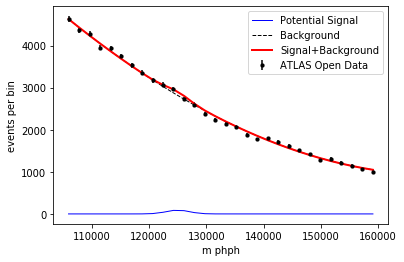

In [152]:
%%time
nBins = 30
minMass = 105000
maxMass = 160000

plt.figure()
plt.xlabel("m phph")
plt.ylabel("events per bin")
countsData, edges = np.histogram(flatData.mass, bins=nBins, range=(minMass,maxMass))
centres = (edges[1:] + edges[:-1]) / 2

# get the width of each bin
bin_width = edges[1] - edges[0]

# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(countsData[0:nBins])

centresFit = (edgesFit[1:] + edgesFit[:-1]) / 2

b = np.poly1d(np.polyfit(centres, countsData, 3))

#guess a signal integral for illustration
integral = 450000.0
s = ( scipy.stats.norm.pdf(centres, 125000.0, 2000.0) * integral)

sb = s+b(centres)
plt.plot(centres, s, 'b', linewidth=1, label="Potential Signal")
plt.plot(centres, b(centres), 'k', linewidth=1, linestyle="--", label="Background")
plt.plot(centres, sb, 'r', linewidth=2, label="Signal+Background")

plt.errorbar(centres, countsData, yerr=np.sqrt(countsData), fmt='o', mfc='k', mec='k',ms=4, mew=0.2, ecolor='k',label="ATLAS Open Data",)
plt.legend()


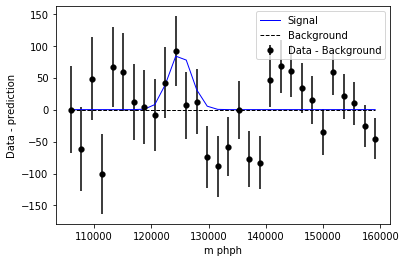

CPU times: user 191 ms, sys: 8.66 ms, total: 199 ms
Wall time: 197 ms


In [153]:
%%time
#ratio plot 
residuals = countsData - b(centres) 
plt.figure()
plt.xlabel("m phph")
plt.ylabel("Data - prediction")
plt.errorbar(centres, residuals, yerr=np.sqrt(countsData), label="Data - Background", fmt='o', mfc='k', mec='k', mew=0.2, ecolor='k')

#guess a signal integral for illustration
integral = 450000.0

plt.plot(centres, s, 'b', linewidth=1, label="Signal")
plt.plot(centres, np.zeros(len(centres)), 'k', linewidth=1, linestyle="--", label="Background")
plt.legend()

plt.show()